In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (18.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 156210 files and di

In [1]:
import requests, json
from tqdm import tqdm
from bs4 import BeautifulSoup
import urllib.parse as parse
import pandas as pd
#visualization
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rcParams
import sklearn as sk
import seaborn as sns

# 브라우저에서 바로 그려지도록 
# %matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumSquareRound') 

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

# font_list = [font.name for font in fm.fontManager.ttflist]
# font_list

In [2]:
rcParams['figure.figsize'] = 12, 8 # 플랏 크기 조절
# sns.set_theme(style="whitegrid")

In [3]:
rcParams['font.size'] = '18' # 폰트 크기 조절

In [8]:
df = pd.read_csv('2번토픽_최신화64.csv')

In [15]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
cond = df['장르'] == '드라마'
df[cond]

In [63]:
df.to_csv('2번토픽전체자료최최종.csv', index=False)

In [ ]:
names = df['제목'].unique()
names

In [54]:
threeMonths = df[df['제목'] == '1초'].iloc[-12:].copy()
threeMonths

lst= [threeMonths]
for i in range(1, len(names)):
  cond = df['제목'] == names[i]
  lst.append(df[cond].iloc[-12:].copy())


threeMonths = pd.concat(lst)

In [70]:
threeMonths.to_csv('최신12화.csv', index=False)

In [56]:
lastYear = df[df['제목'] == '1초'].iloc[0:-12].copy()

lst= [lastYear]
for i in range(1, len(names)):
  cond = df['제목'] == names[i]
  lst.append(df[cond].iloc[0:-12].copy())


lastYear = pd.concat(lst)

In [60]:
lastYear.to_csv('작년52화.csv', index=False)

In [ ]:
pd.read_csv('2번토픽_최신화64.csv')

In [4]:
lastYear = pd.read_csv('2번토픽작년52화.csv')

In [5]:
threeMonths = pd.read_csv('2번토픽최신12화.csv')

In [ ]:
lastYear['기간'] = 52
numbers = [i for i in range(1,53)]*50
lastYear['순서'] = numbers
display(lastYear)
threeMonths['기간'] = 12
# threeMonths.groupby('')
numbers = [i for i in range(1,13)]*50
threeMonths['순서'] = numbers
threeMonths

In [ ]:
whole = pd.concat([lastYear, threeMonths])
whole

In [ ]:
whole['제목'].unique()

In [ ]:
cond = (whole['기간'] == 52) & (whole['제목'] == '랜덤채팅의그녀')
# cond_ = whole['제목'] == '랜덤채팅의그녀'
whole[cond]


In [ ]:
whole.head()

In [111]:
df = whole

In [ ]:
df

In [112]:
lst= []

for i in range(1, 53):
  cond = (df['기간'] == 52) & (df['순서'] == i)
  lst.append(df[cond].groupby('장르')[['평점']].mean().round(2).transpose())
temp = pd.concat(lst).reset_index()
temp.drop('index', axis=1, inplace=True)
temp.columns.name = None

dict_keys(['좋아요수', '평점', '평점기여자수', '전체댓글수', '베댓공감수', '베댓비공감수'])

In [120]:
data = {}
lst= []
cols = ['좋아요수',	'평점',	'평점기여자수',	'전체댓글수',	'베댓공감수',	'베댓비공감수']
for col in cols:
  for i in range(1, 53):
    cond = (df['기간'] == 52) & (df['순서'] == i)
    lst.append(df[cond].groupby('장르')[[col]].mean().round(2).transpose())
  data[col] = pd.concat(lst).reset_index()
  data[col].drop('index', axis=1, inplace=True)
  data[col].columns.name = None
  data[col]['종류'] = col
  lst= []

lasYear52 = pd.concat([item for item in data.values()])
lasYear52
# data.keys()

,드라마,순정,스릴러,액션,판타지,종류
0,23321.3,19384.4,7414.00,16884.0,13604.18,좋아요수
1,23328.5,19522.2,7673.67,16758.4,13073.55,좋아요수
2,26332.0,19240.3,7450.44,16691.4,12992.91,좋아요수
3,23030.7,18597.7,7538.78,16429.6,12718.18,좋아요수
4,22016.4,19020.8,7620.67,16539.9,12651.91,좋아요수
...,...,...,...,...,...,...
47,1203.3,970.5,307.11,826.6,501.45,베댓비공감수
48,1676.4,708.3,198.78,802.6,488.00,베댓비공감수
49,1882.8,661.3,133.11,549.7,376.27,베댓비공감수
50,2159.6,520.0,216.67,733.3,556.09,베댓비공감수


In [146]:
rcParams['figure.figsize'] = 20, 8 # 플랏 크기 조절
# sns.set_theme(style="whitegrid")

In [147]:
rcParams['font.size'] = '18' # 폰트 크기 조절

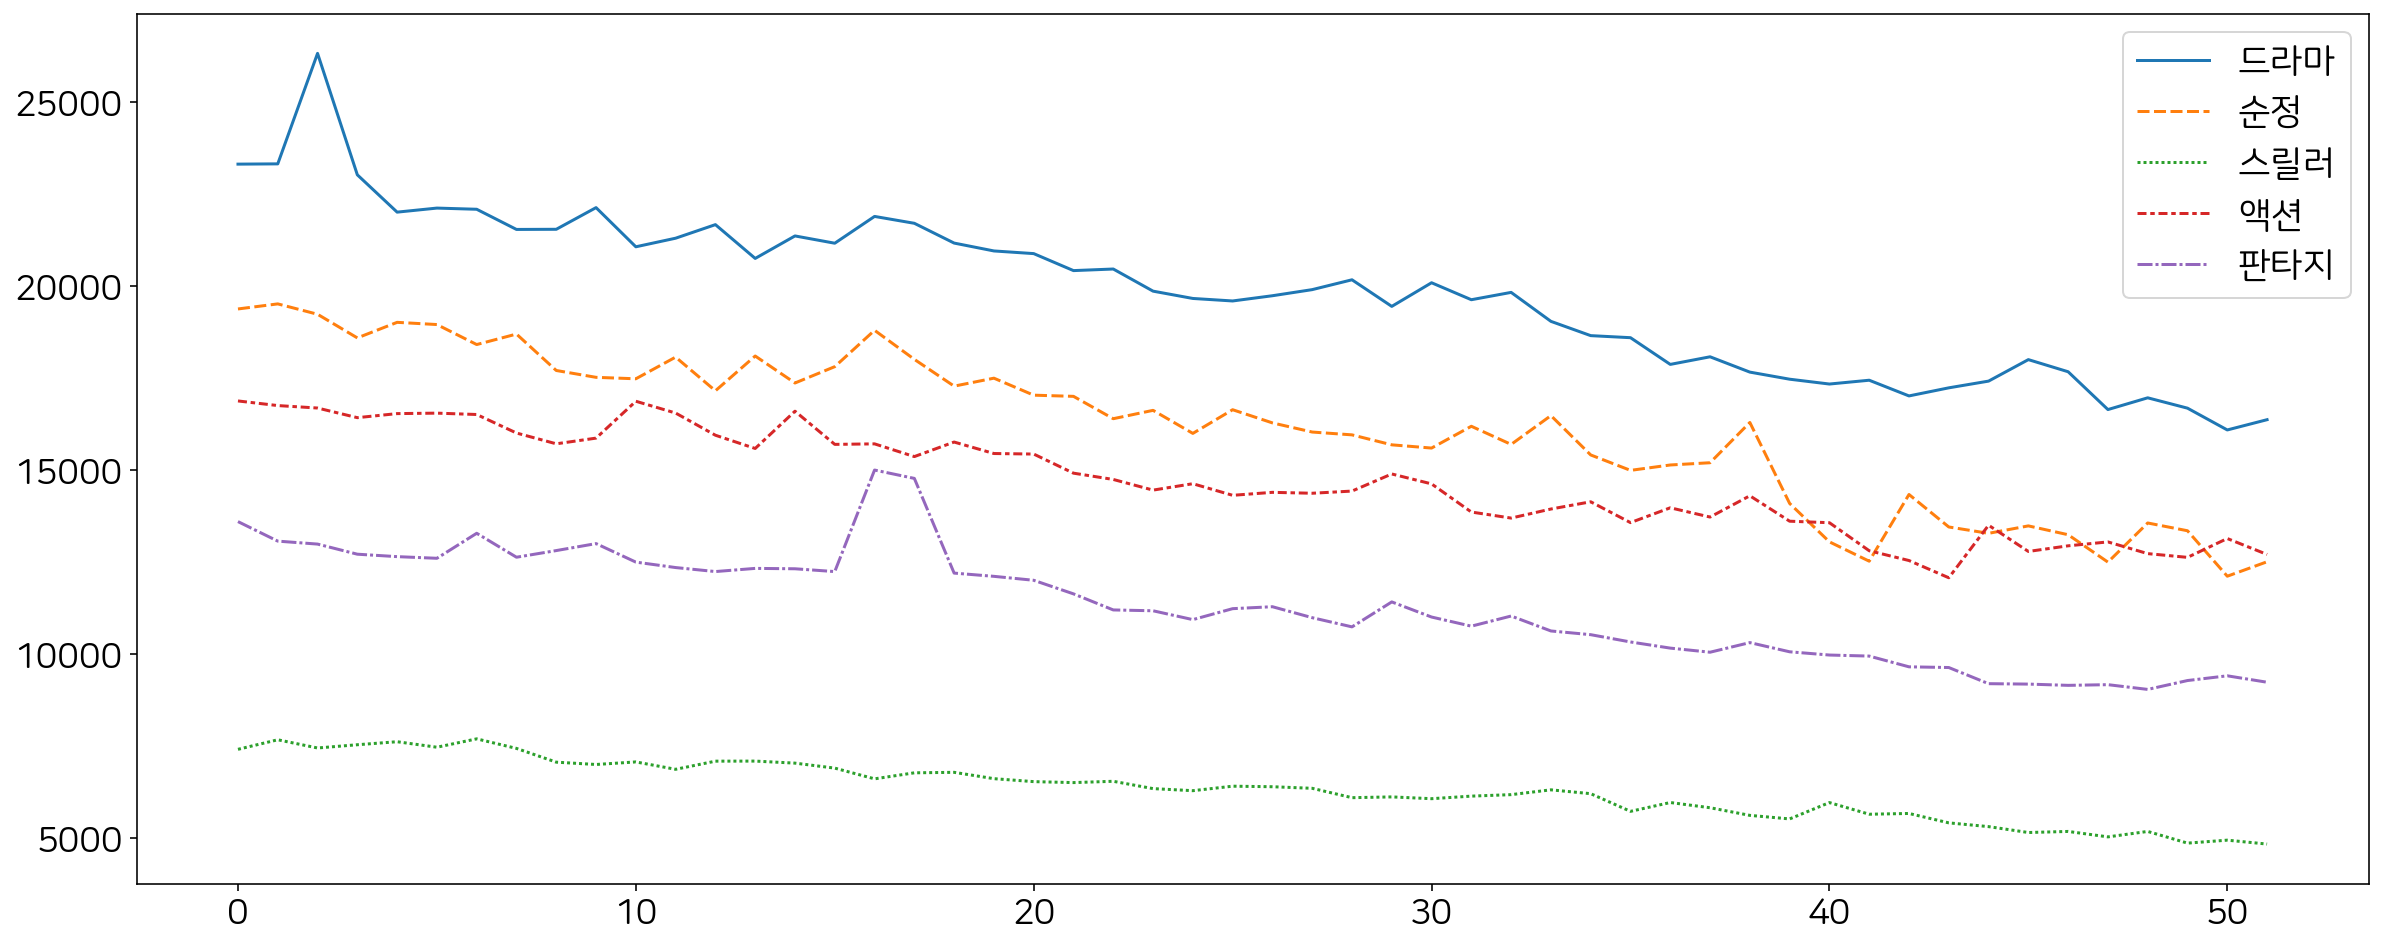

In [148]:
cond = lasYear52['종류'] == '좋아요수'
sns.lineplot(data=lasYear52[cond])

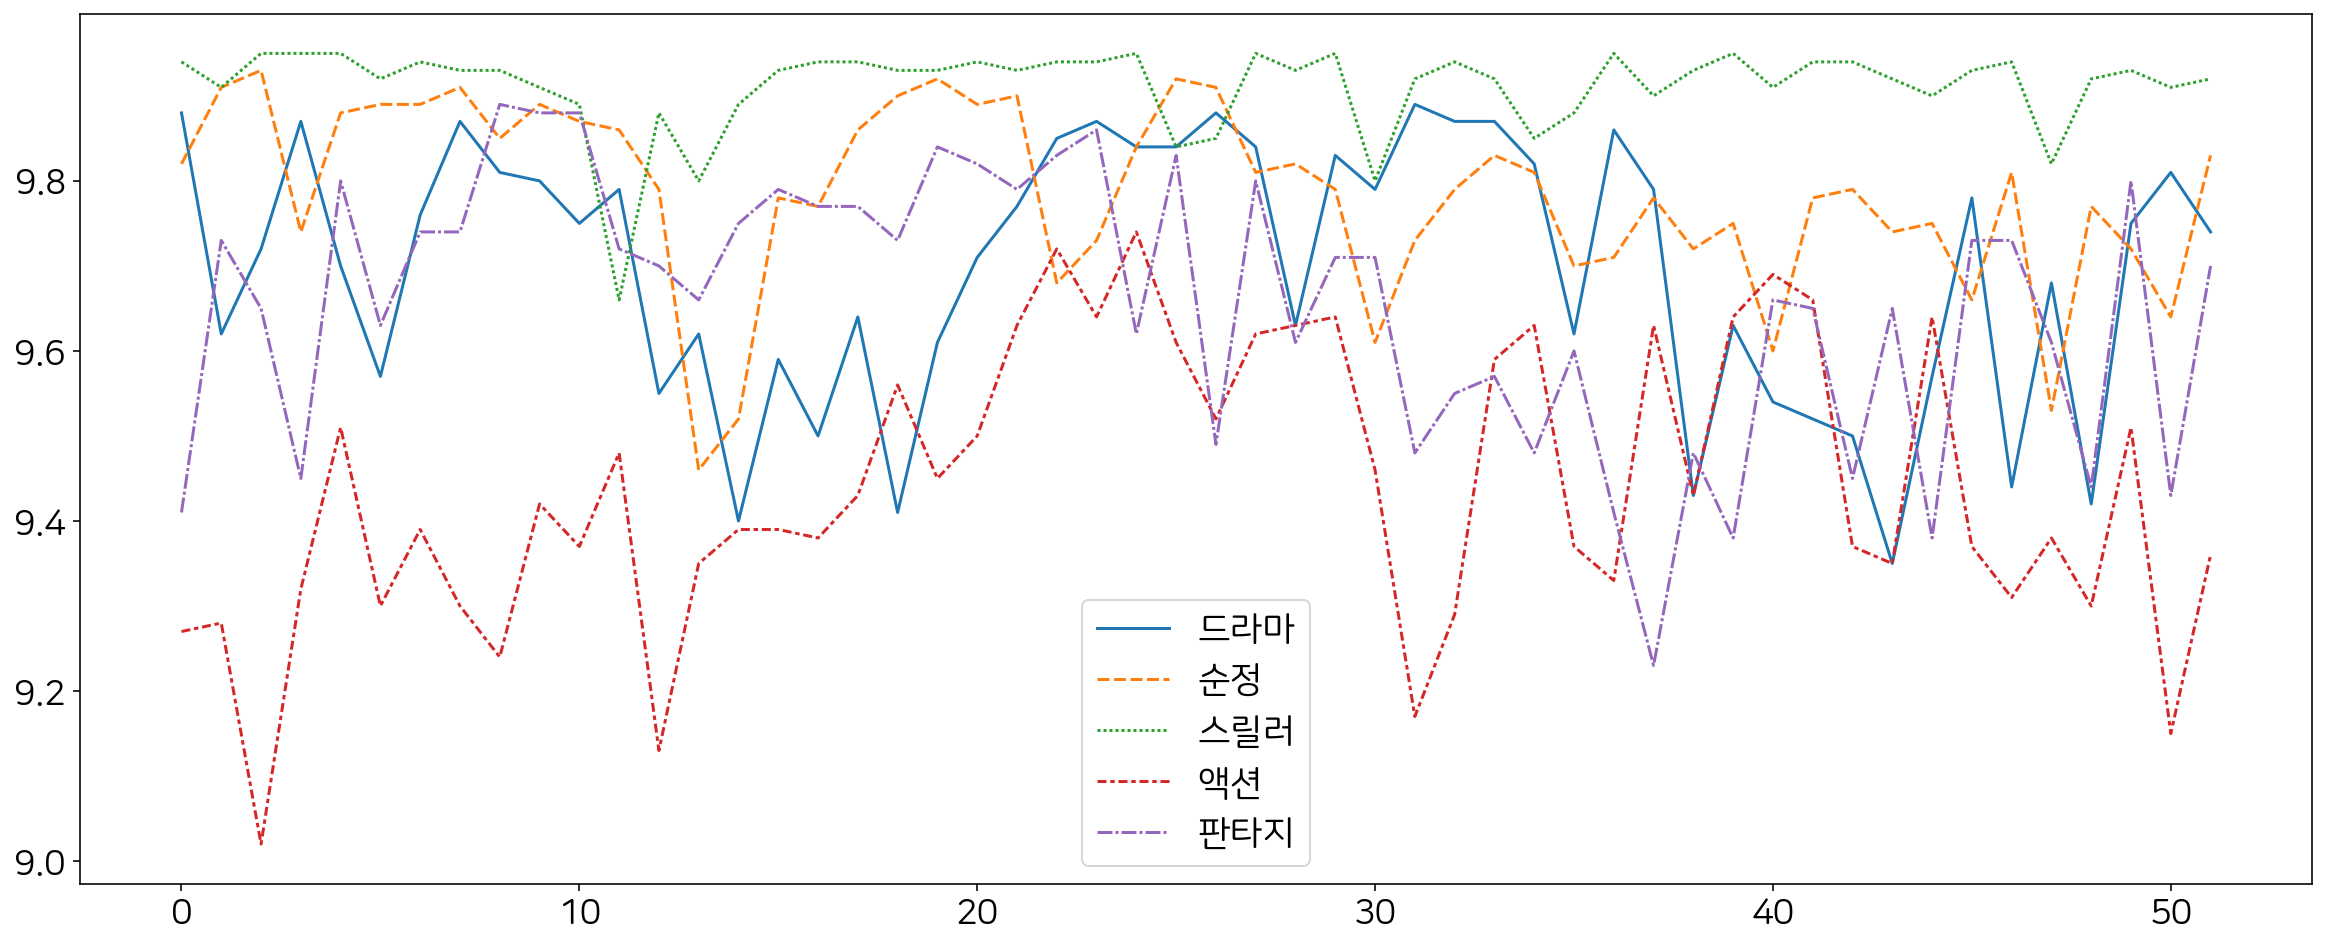

In [149]:
cond = lasYear52['종류'] == '평점'
sns.lineplot(data=lasYear52[cond])

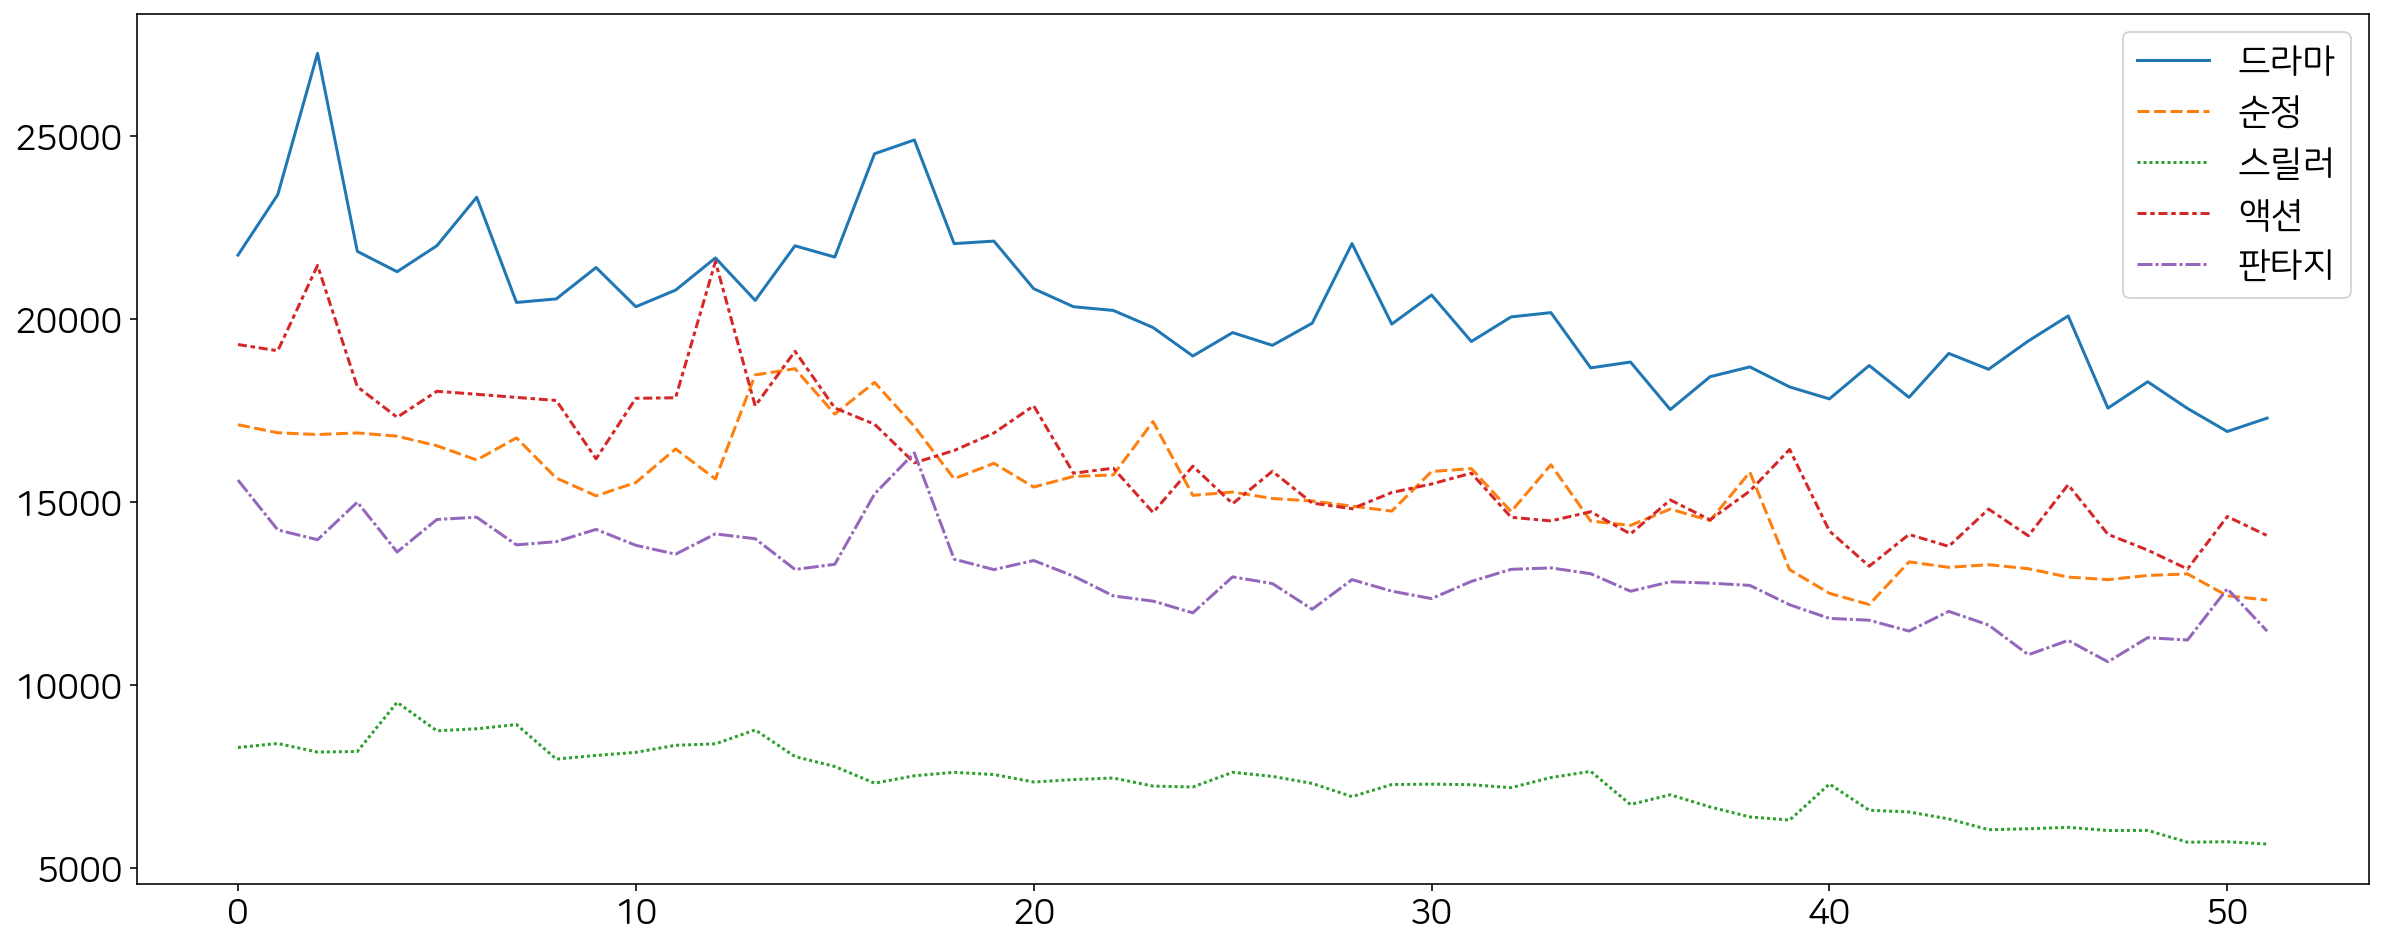

In [150]:
cond = lasYear52['종류'] == '평점기여자수'
sns.lineplot(data=lasYear52[cond])

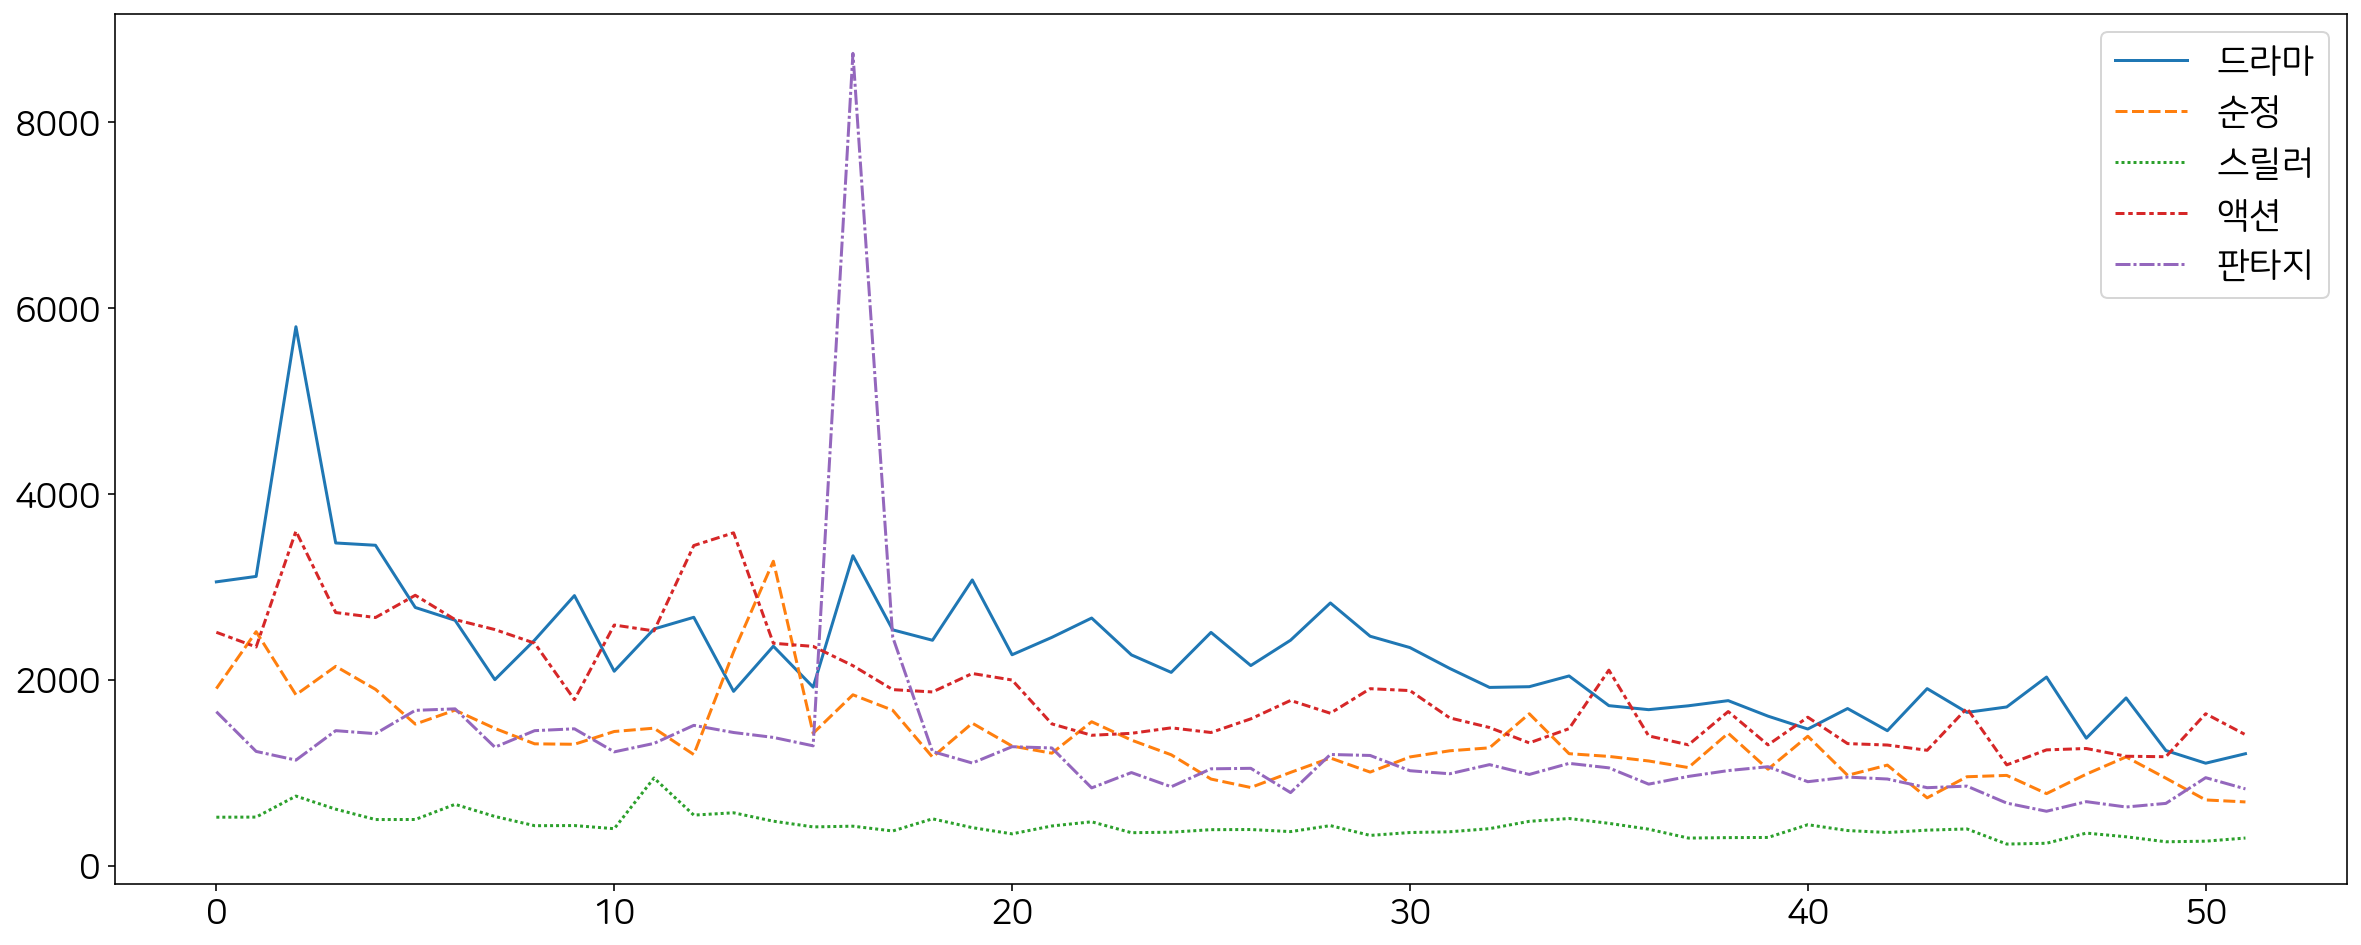

In [151]:
cond = lasYear52['종류'] == '전체댓글수'
sns.lineplot(data=lasYear52[cond])

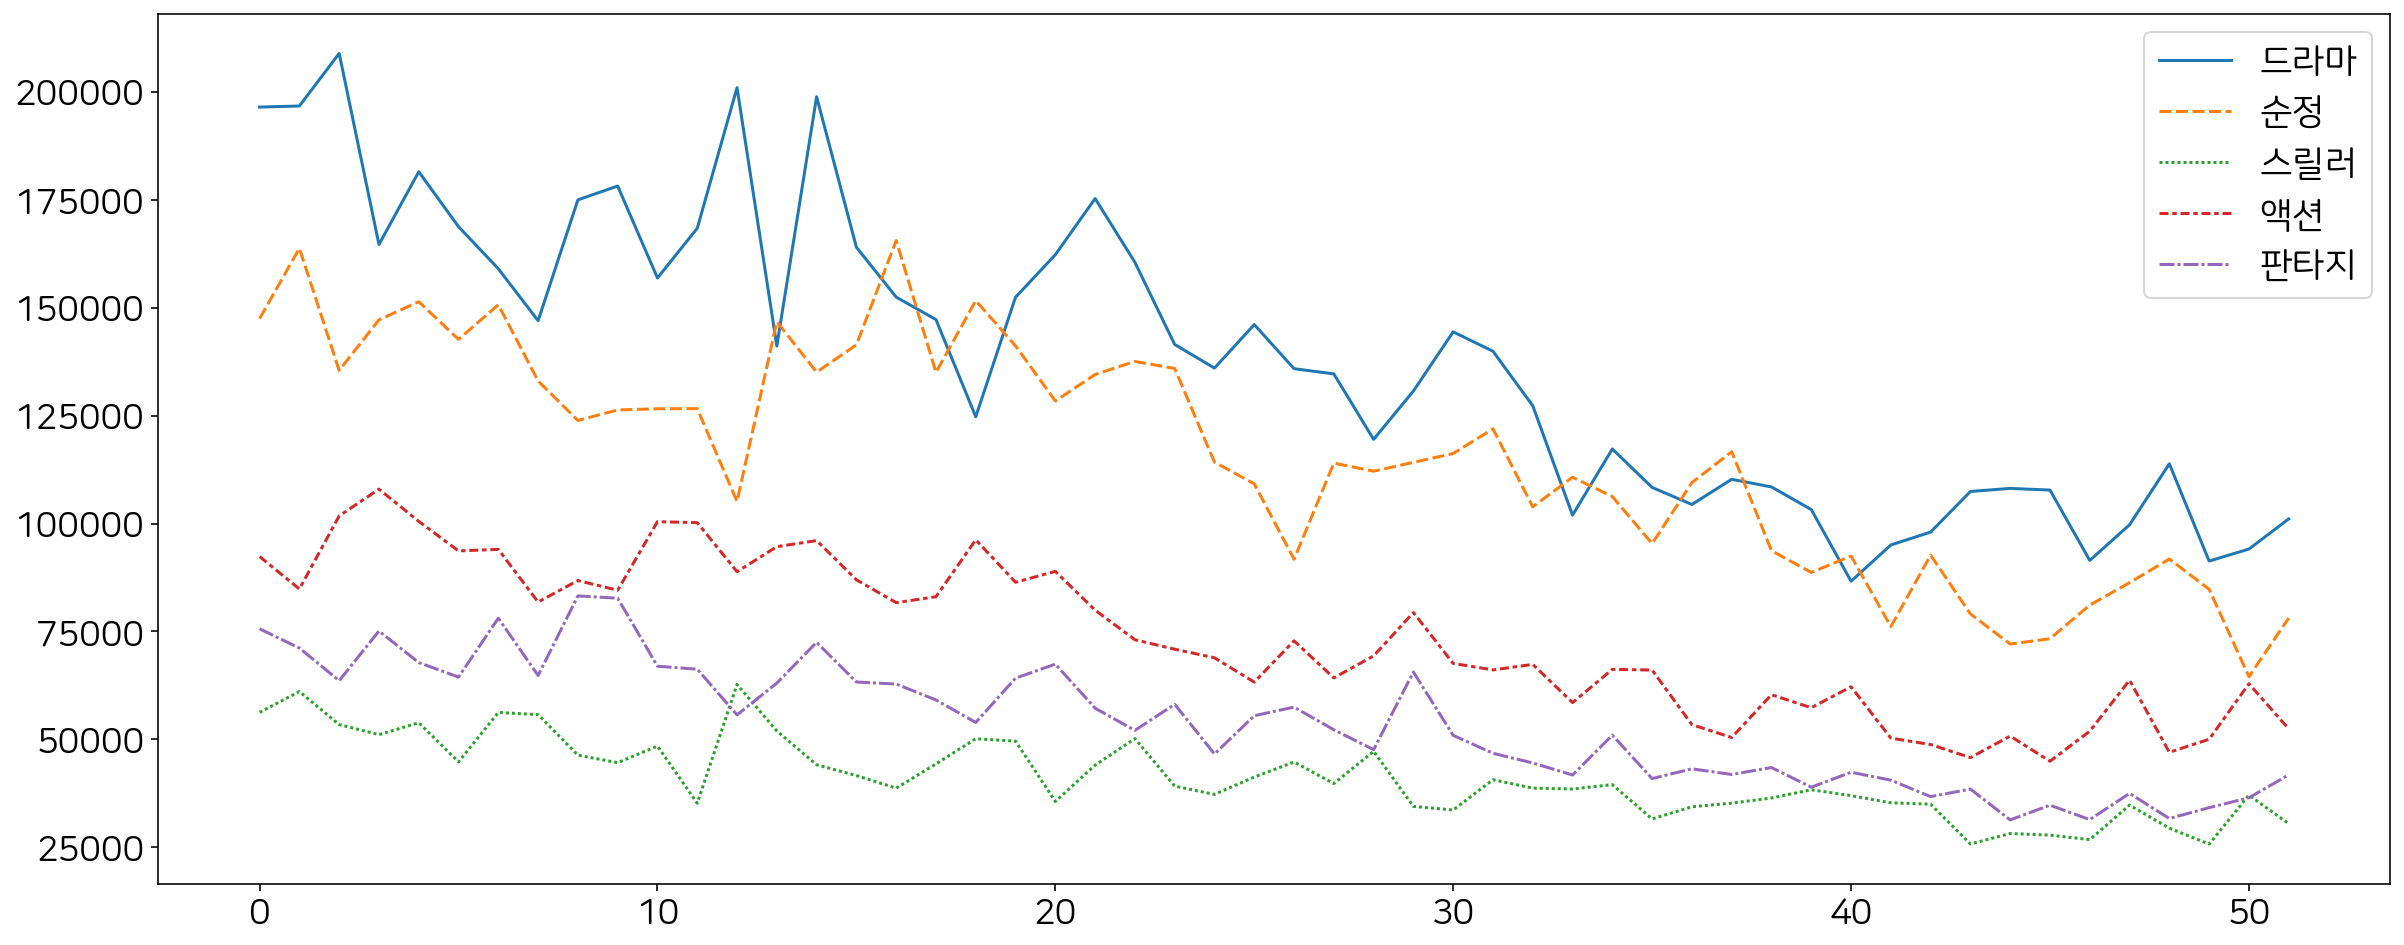

In [152]:
cond = lasYear52['종류'] == '베댓공감수'
sns.lineplot(data=lasYear52[cond])

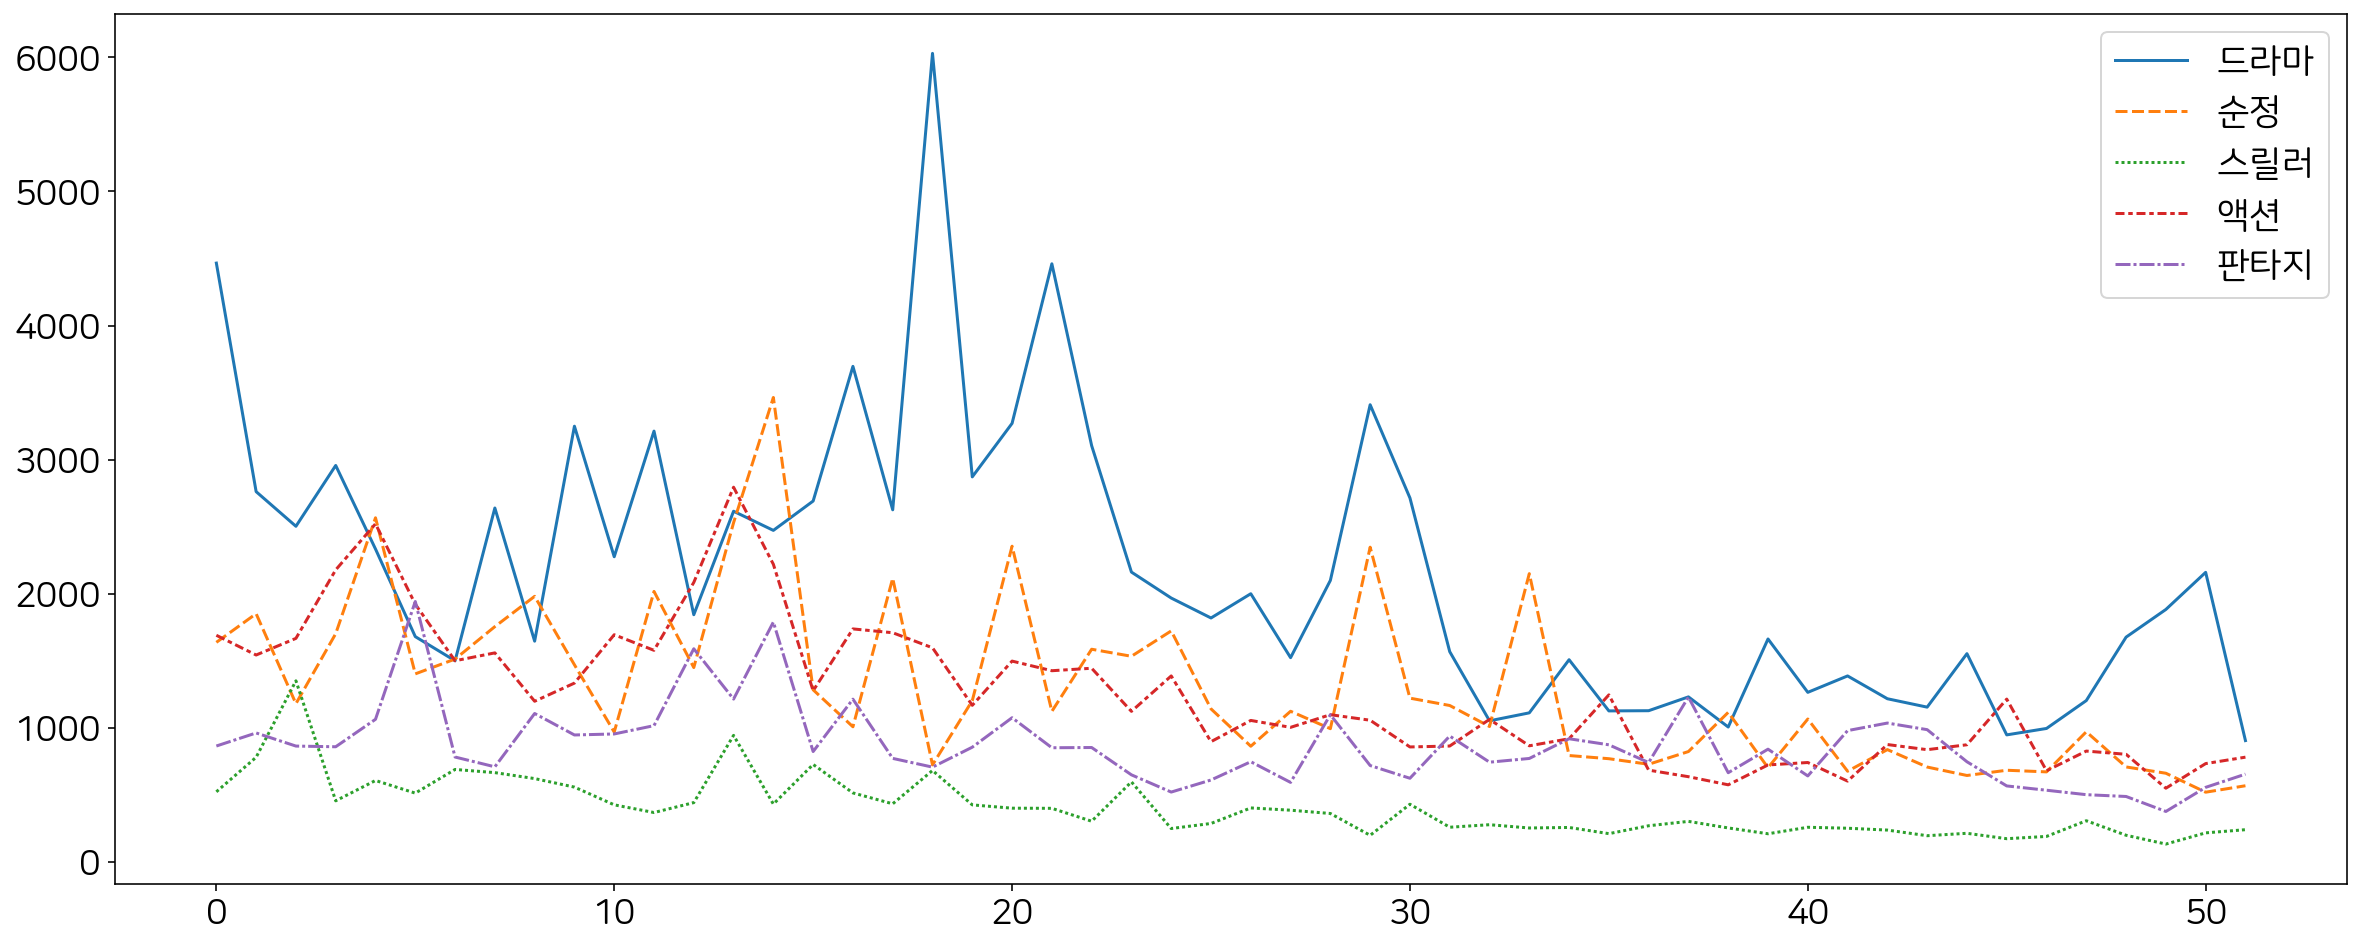

In [153]:
cond = lasYear52['종류'] == '베댓비공감수'
sns.lineplot(data=lasYear52[cond])

In [154]:
data = {}
lst= []
cols = ['좋아요수',	'평점',	'평점기여자수',	'전체댓글수',	'베댓공감수',	'베댓비공감수']
for col in cols:
  for i in range(1, 13):
    cond = (df['기간'] == 12) & (df['순서'] == i)
    lst.append(df[cond].groupby('장르')[[col]].mean().round(2).transpose())
  data[col] = pd.concat(lst).reset_index()
  data[col].drop('index', axis=1, inplace=True)
  data[col].columns.name = None
  data[col]['종류'] = col
  lst= []

thisYear12 = pd.concat([item for item in data.values()])
thisYear12
# data.keys()

,드라마,순정,스릴러,액션,판타지,종류
0,16191.0,12300.5,5206.78,12240.0,9070.09,좋아요수
1,16038.5,12143.1,4706.44,14199.6,8861.73,좋아요수
2,15681.9,12724.2,4929.11,13503.7,8537.91,좋아요수
3,15468.0,11872.8,4922.56,11516.4,8483.73,좋아요수
4,15460.9,11807.4,4510.44,11863.9,8571.73,좋아요수
...,...,...,...,...,...,...
7,1488.0,436.9,201.44,639.8,256.55,베댓비공감수
8,684.6,421.5,171.44,942.9,304.73,베댓비공감수
9,699.0,675.8,130.22,716.1,572.27,베댓비공감수
10,571.8,1160.3,114.11,952.6,545.00,베댓비공감수


In [155]:
rcParams['figure.figsize'] = 20, 8 # 플랏 크기 조절
# sns.set_theme(style="whitegrid")

In [156]:
rcParams['font.size'] = '18' # 폰트 크기 조절

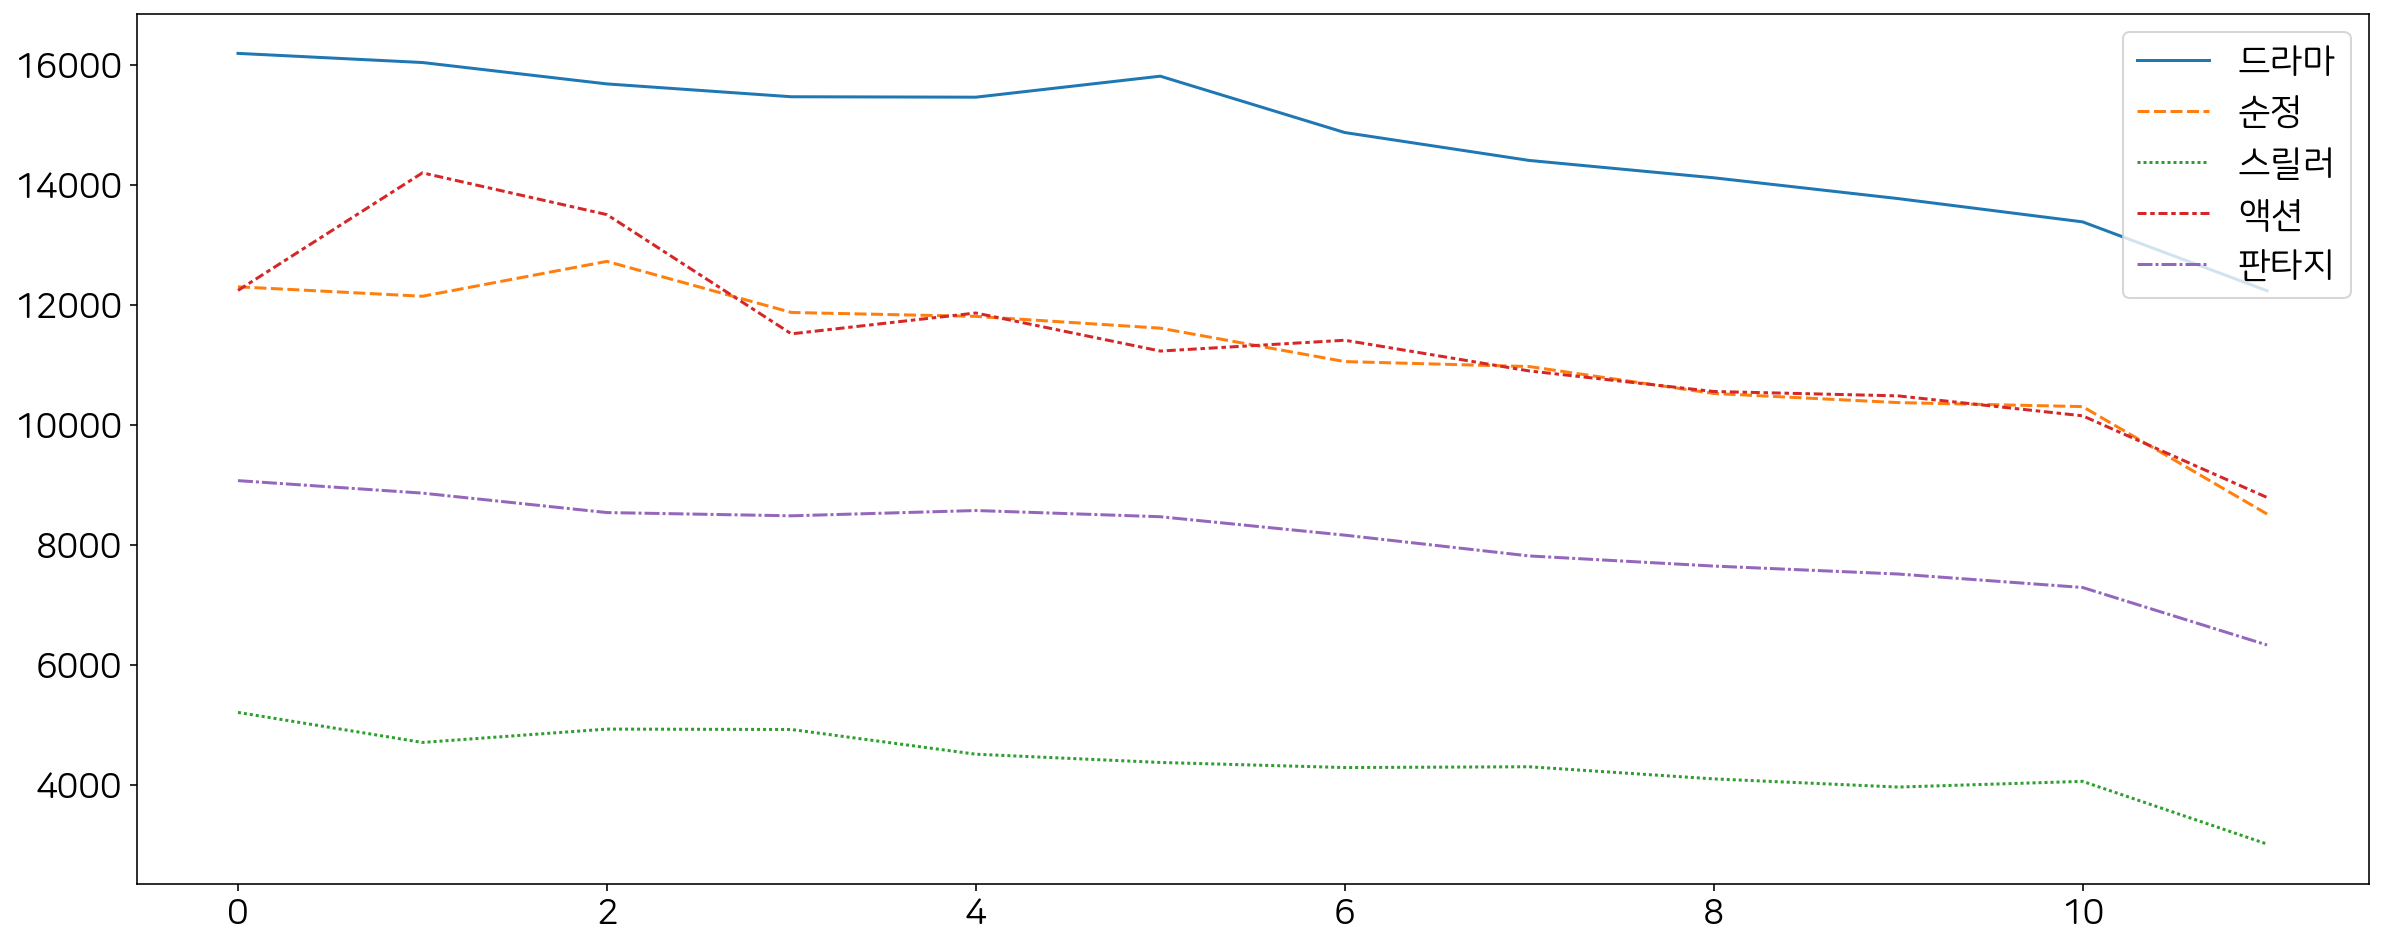

In [157]:
cond = thisYear12['종류'] == '좋아요수'
sns.lineplot(data=thisYear12[cond])

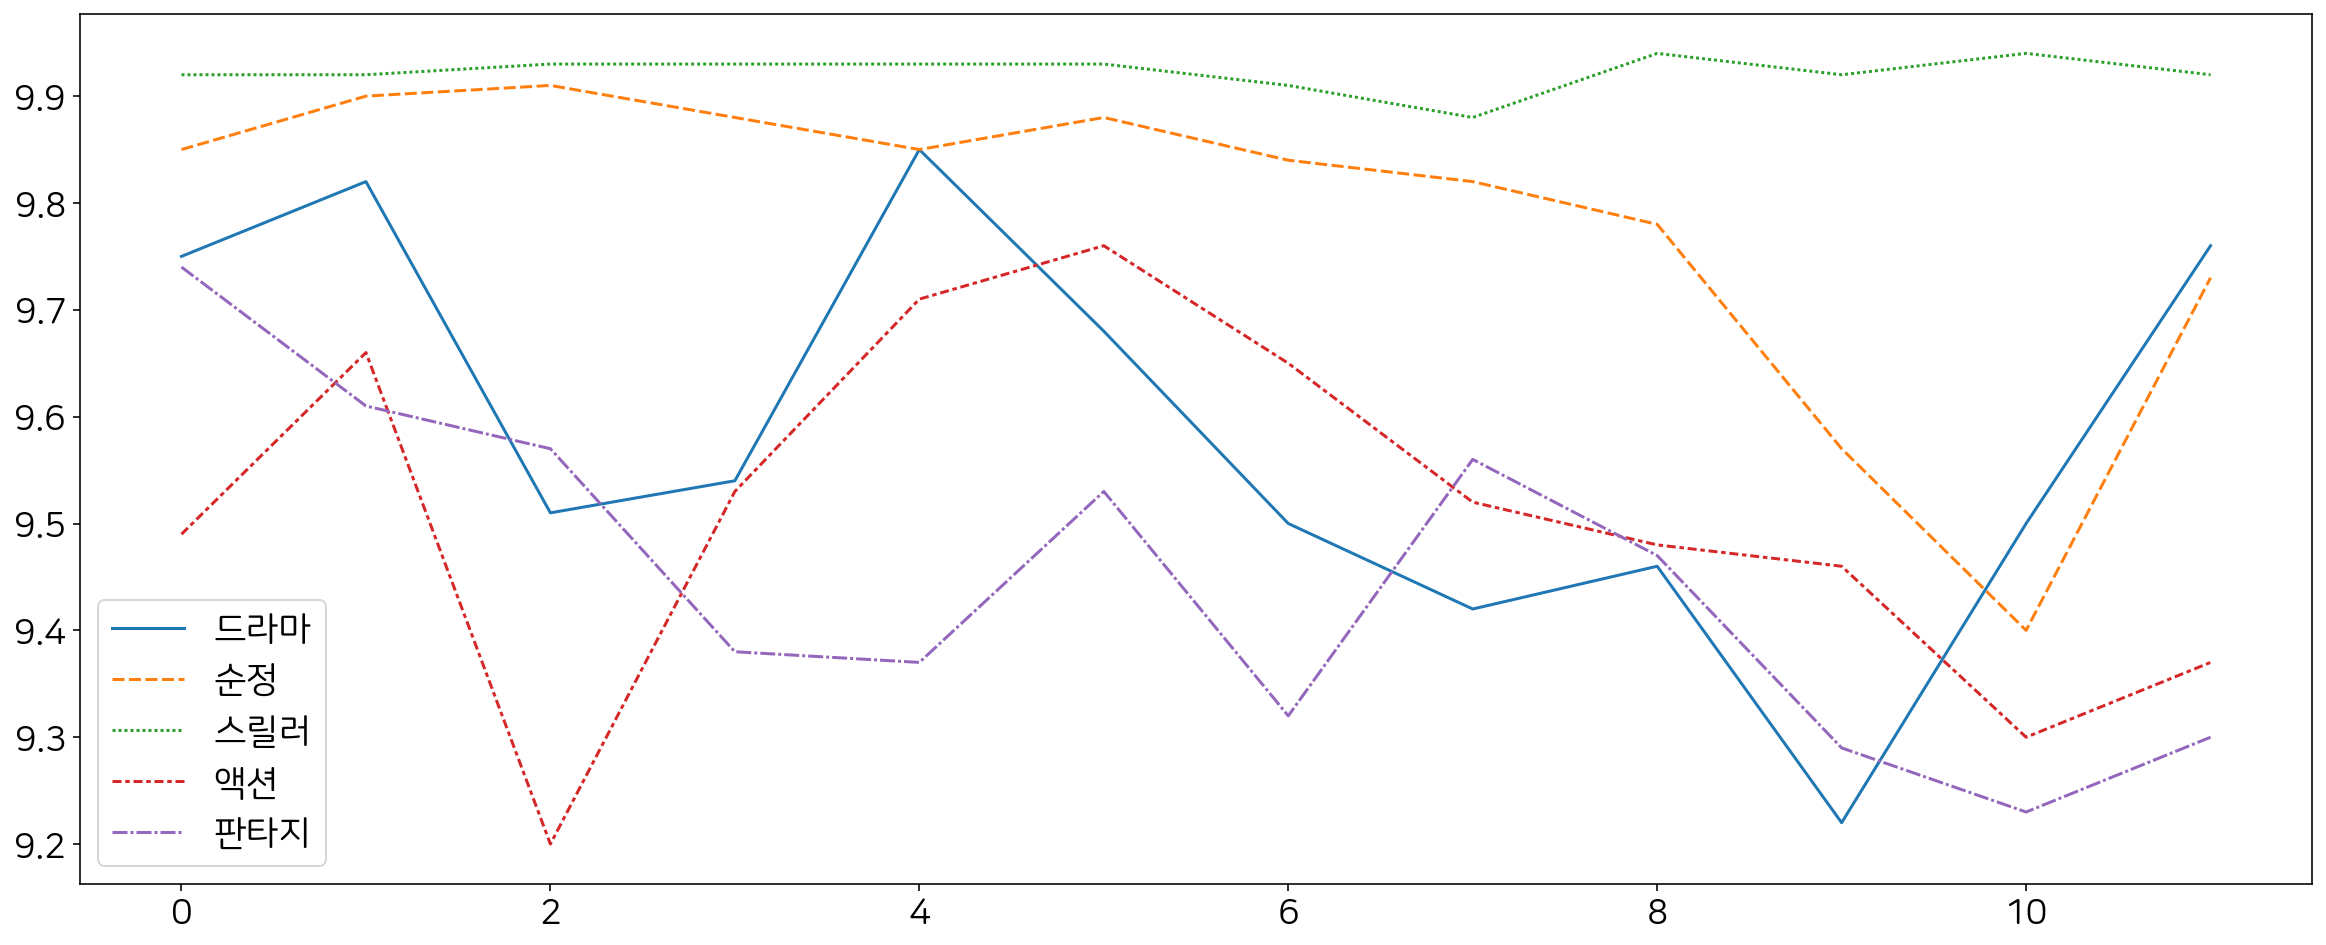

In [158]:
cond = thisYear12['종류'] == '평점'
sns.lineplot(data=thisYear12[cond])

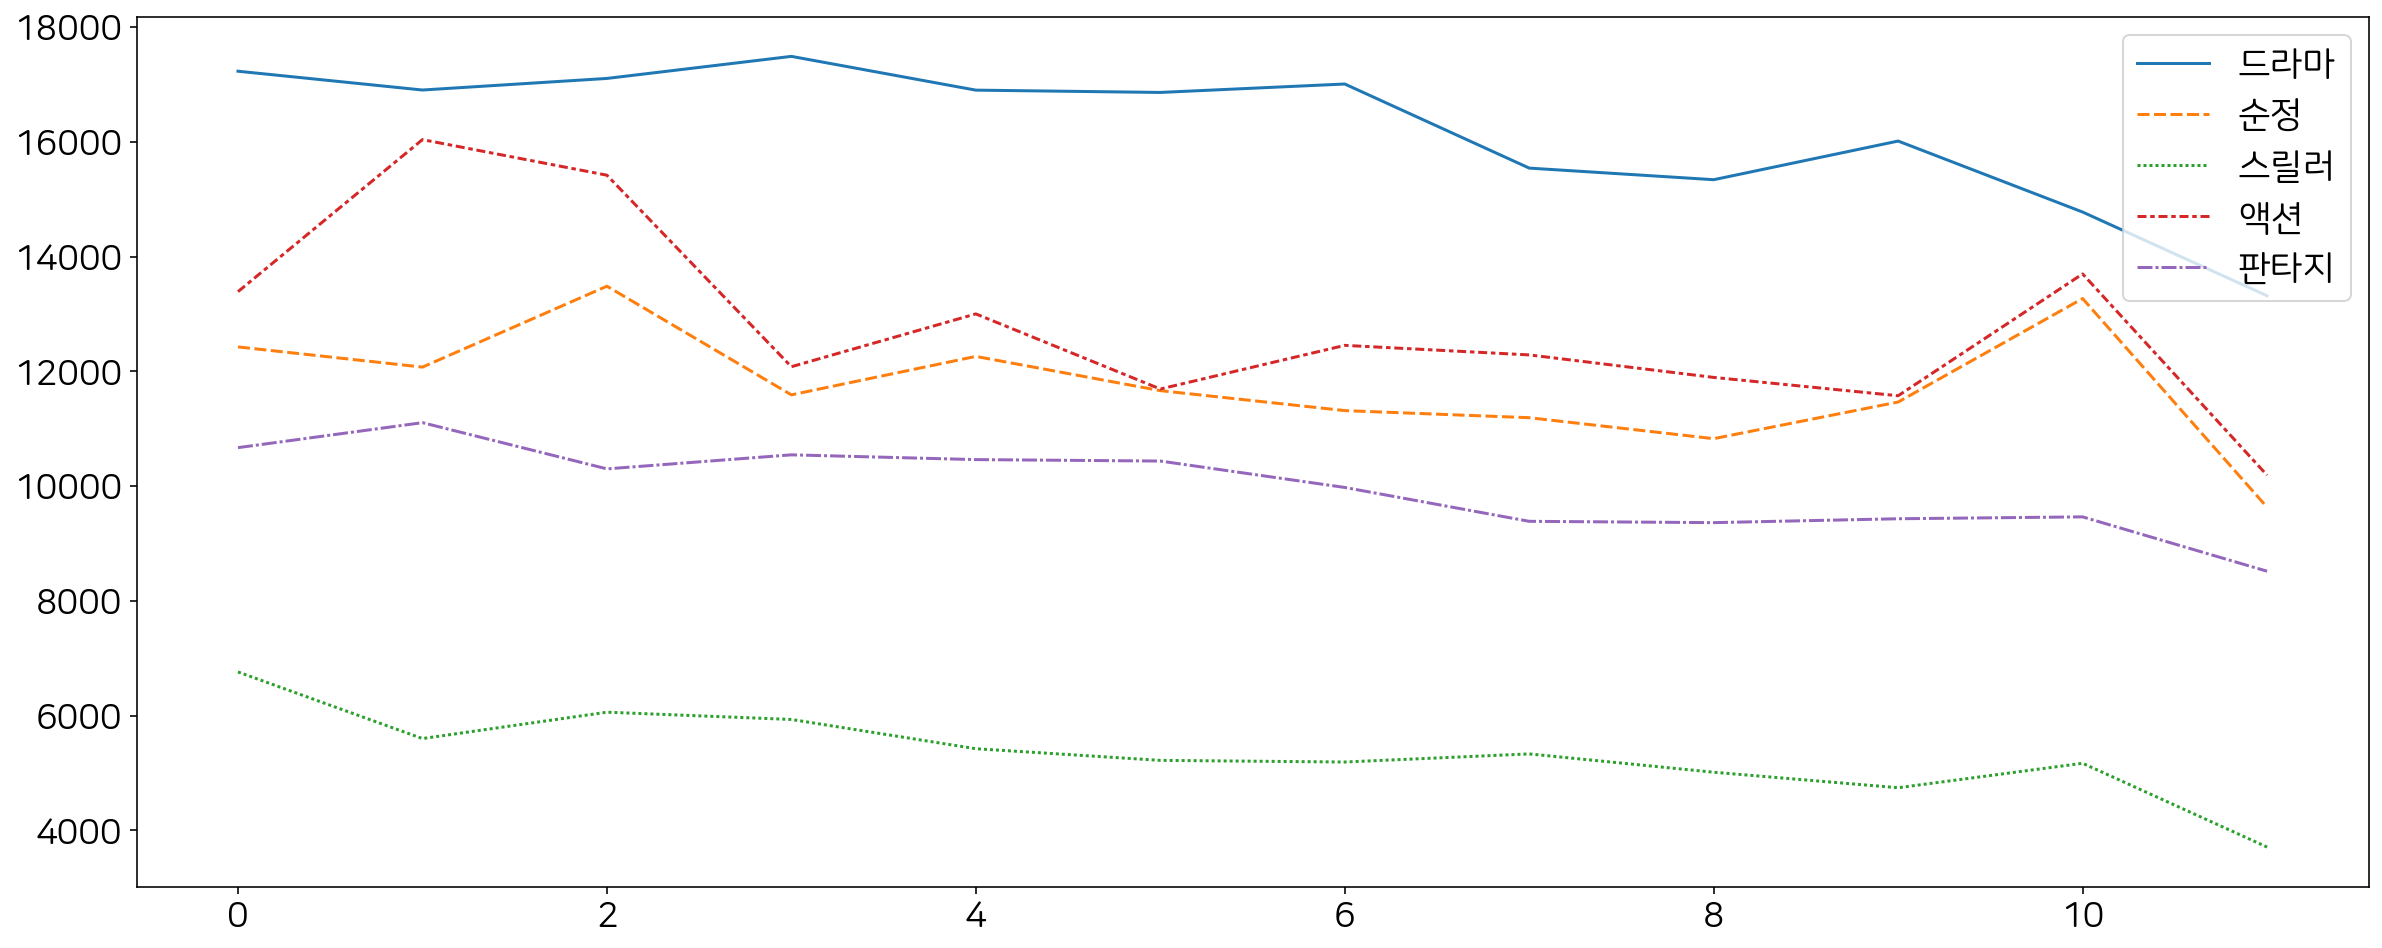

In [159]:
cond = thisYear12['종류'] == '평점기여자수'
sns.lineplot(data=thisYear12[cond])

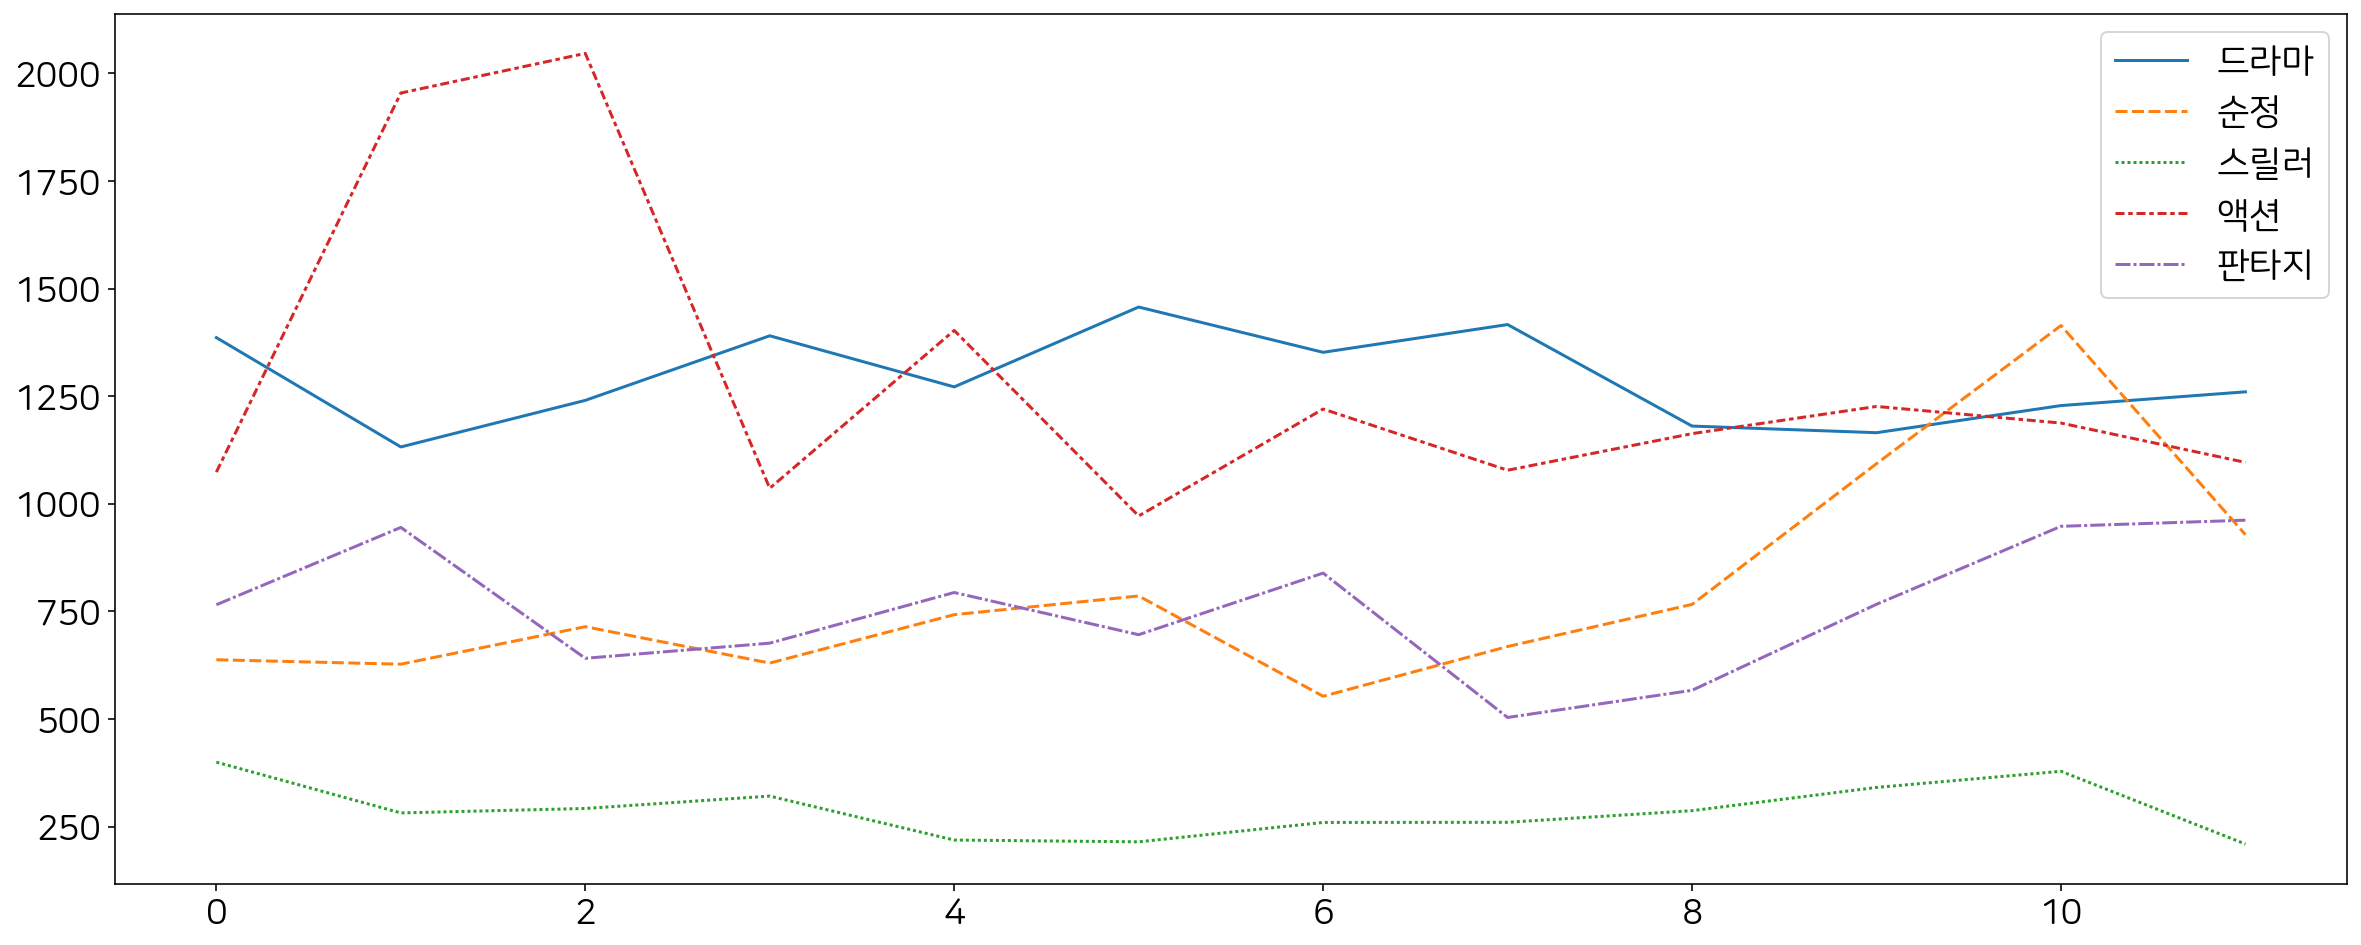

In [160]:
cond = thisYear12['종류'] == '전체댓글수'
sns.lineplot(data=thisYear12[cond])

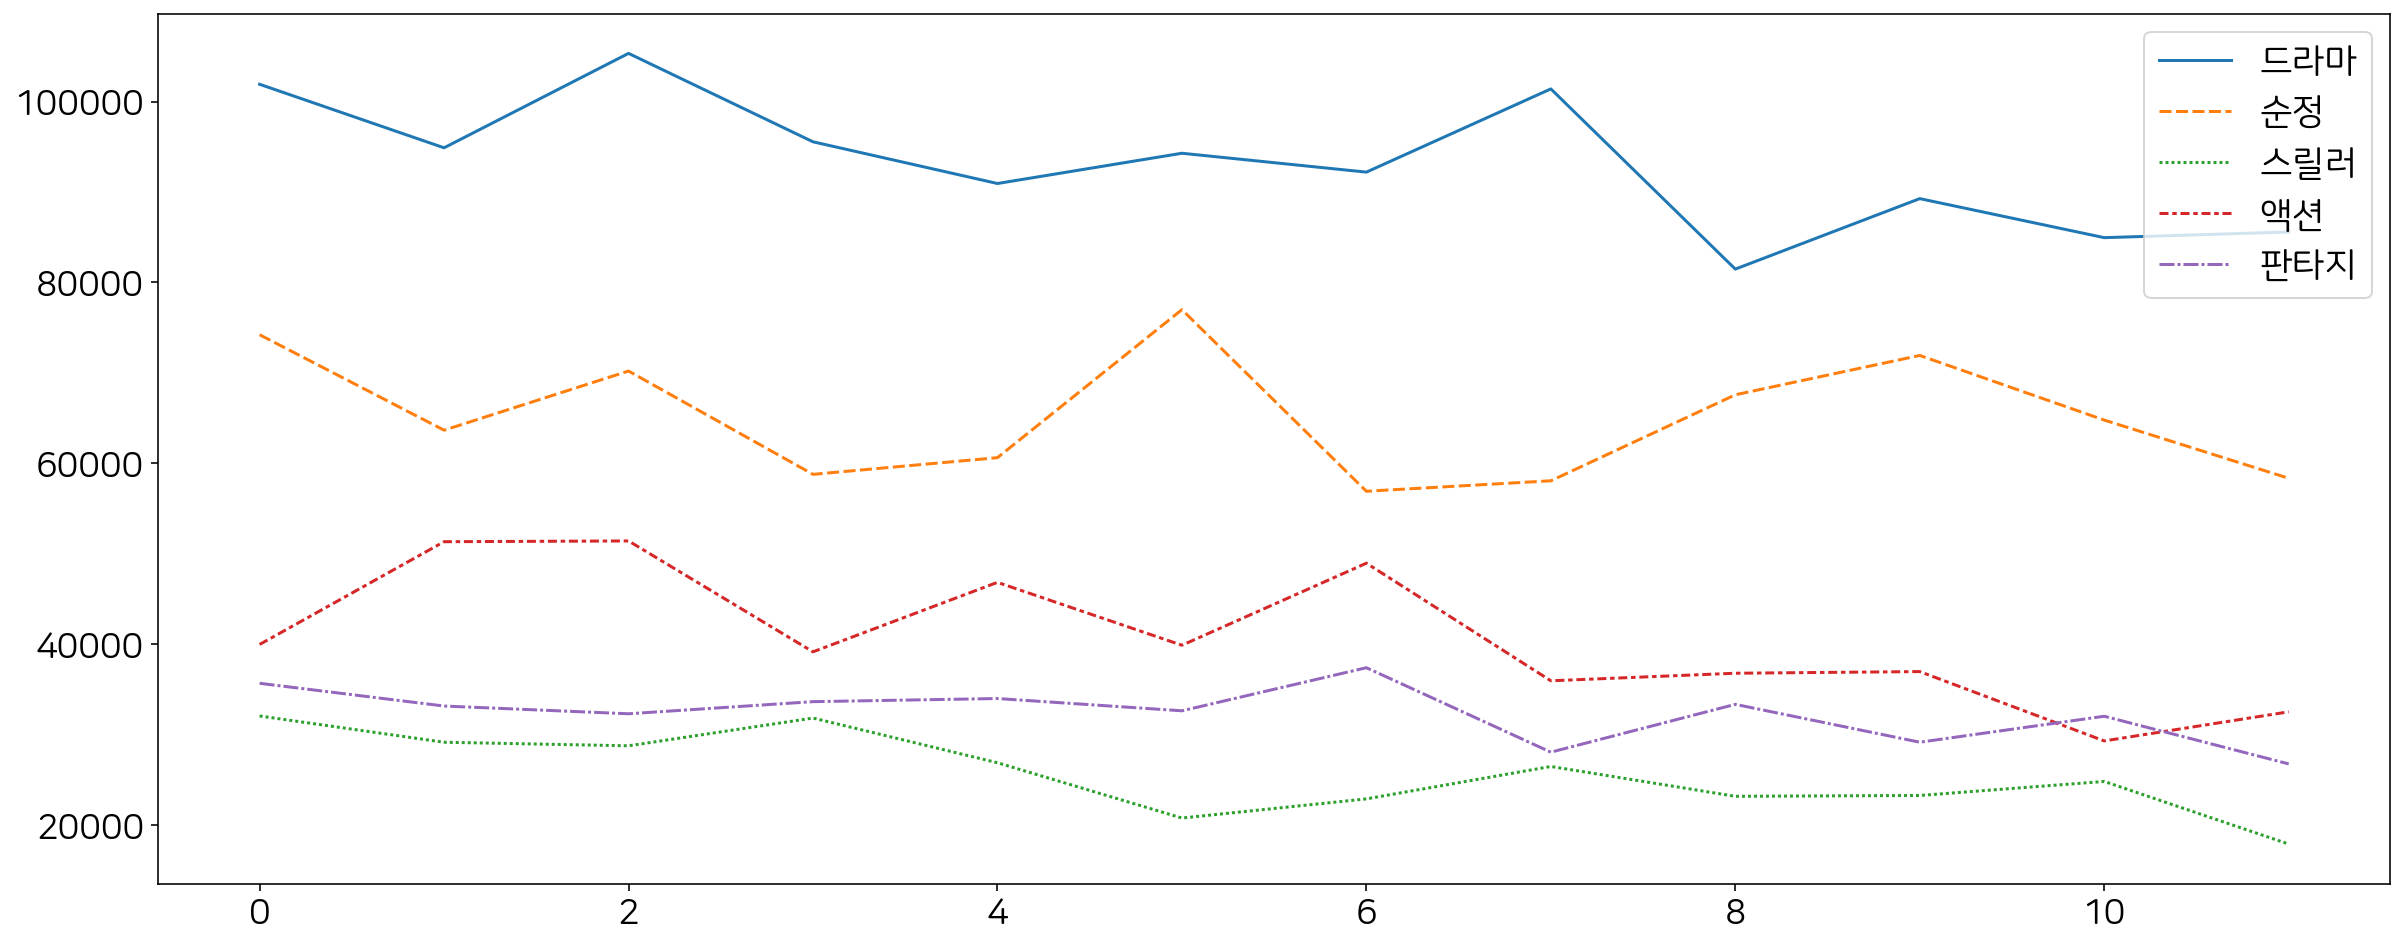

In [161]:
cond = thisYear12['종류'] == '베댓공감수'
sns.lineplot(data=thisYear12[cond])

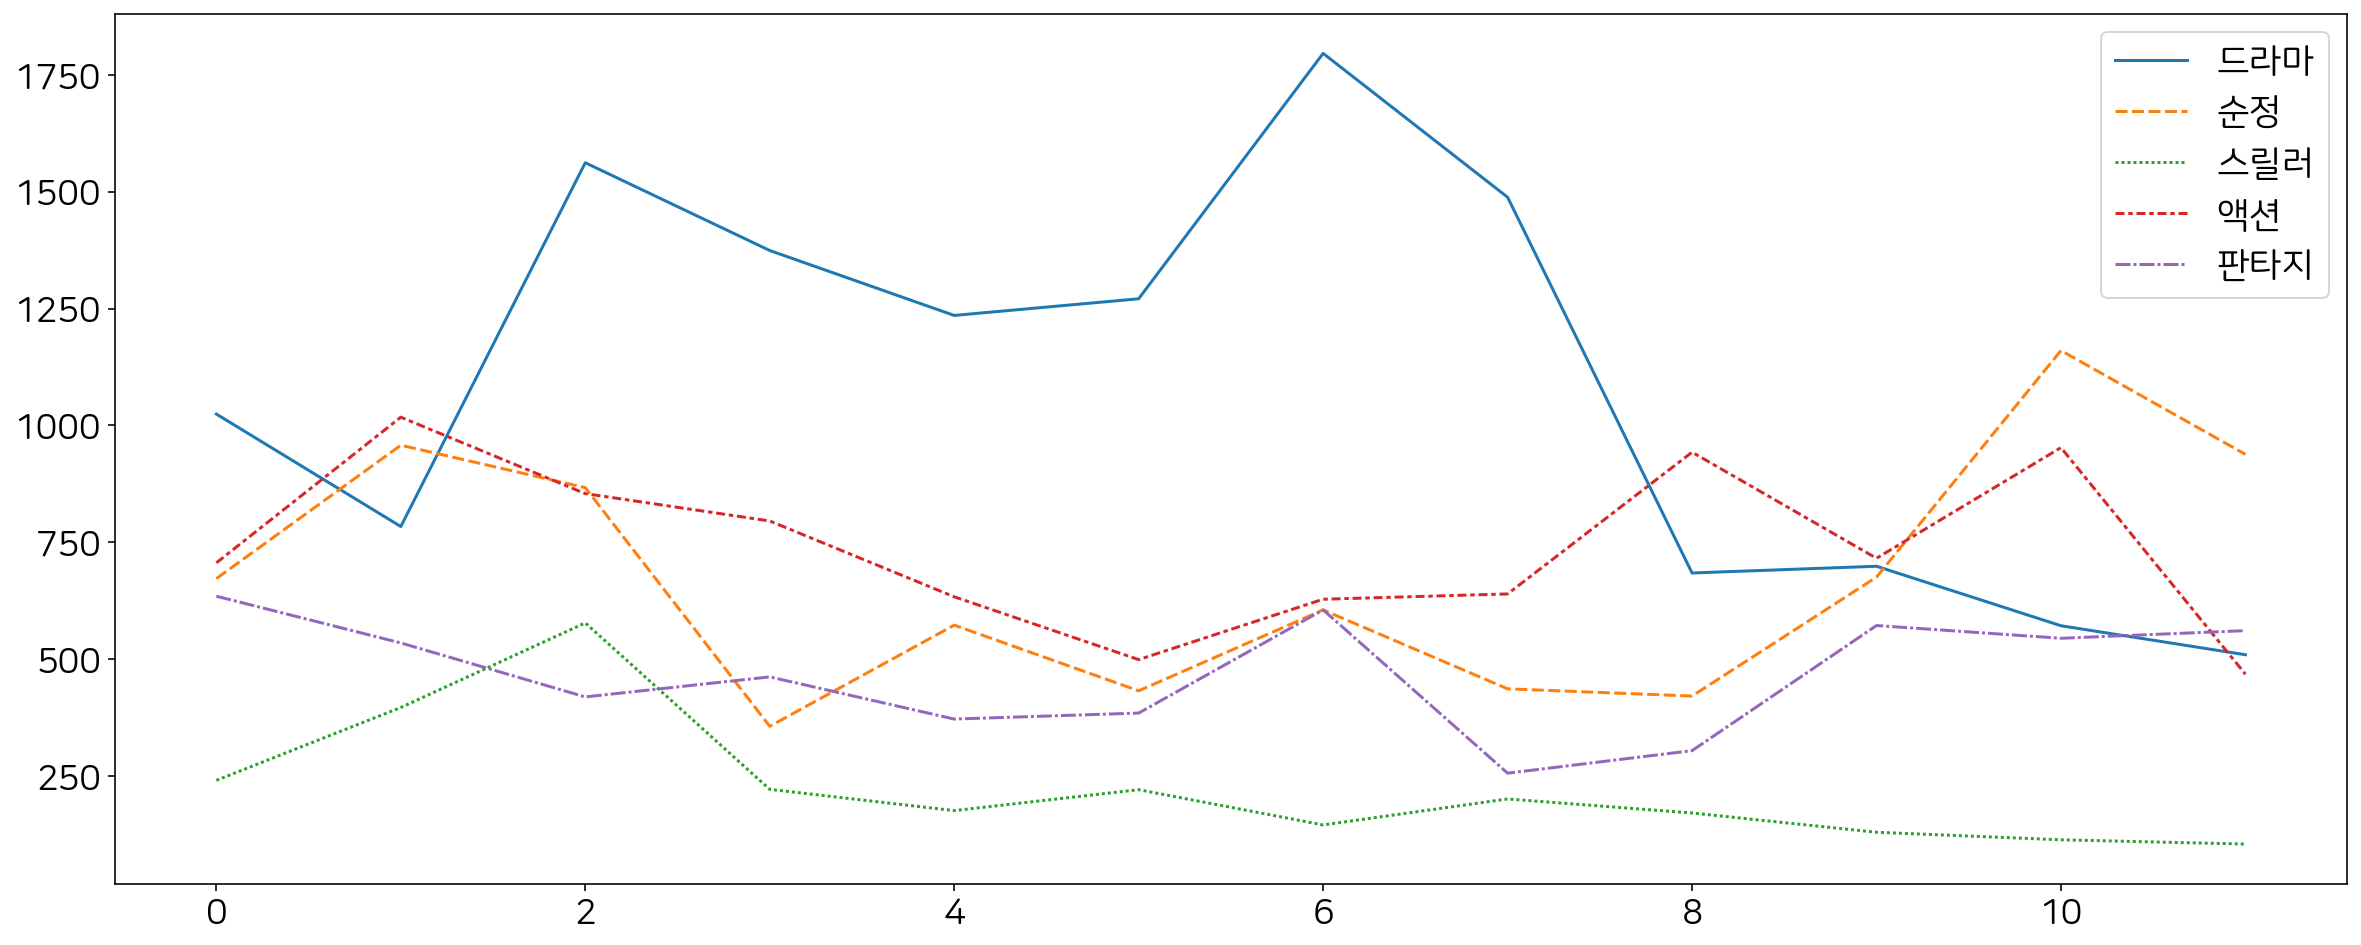

In [162]:
cond = thisYear12['종류'] == '베댓비공감수'
sns.lineplot(data=thisYear12[cond])